In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [4]:
tweets=pd.read_csv('/content/Elon_musk.csv',encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


Text Preprocessing

In [5]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [6]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [7]:
# Define a list of tokens
tweets_tokens = ['token1', 'token2', 'token3']

# Join the list into one string/text
tweets_tokens_text = ' '.join(tweets_tokens)

# Now you can use tweets_tokens_text as a string containing the joined tokens
print(tweets_tokens_text)


token1 token2 token3


In [8]:
# Define the text containing punctuation and URLs
no_punc_text = "This is a sample text with a URL: https://example.com."

# Remove URLs from the text
import re
no_url_text = re.sub(r'http\S+', '', no_punc_text)

# Now you can use no_url_text, which contains the text with URLs removed
print(no_url_text)


This is a sample text with a URL: 


In [9]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['This', 'is', 'a', 'sample', 'text', 'with', 'a', 'URL', ':']


In [11]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# Tokens count
len(text_tokens)

9

In [13]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['This', 'sample', 'text', 'URL', ':']


In [14]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

[]


In [15]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

[]


In [16]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

this sample text url :


In [17]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['this', 'sample', 'text', 'url', ':']


In [18]:
clean_tweets=' '.join(lemmas)
clean_tweets

'this sample text url :'

Feature Extaction
1. Using CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'this': 2, 'sample': 0, 'text': 1, 'url': 3}


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Replace 'your_text_data' with your actual text data
your_text_data = ["This is the first document.", "This document is the second document.", "And this is the third one."]

# Create a CountVectorizer object and fit it to your text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(your_text_data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Now you can access feature names
print(feature_names[100:200])



[]


In [21]:
print(tweetscv.toarray()[100:200])

[]


In [22]:
print(tweetscv.toarray().shape)

(5, 4)


2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Replace 'lemmas' with your list of lemmas or text data
lemmas = ["This is the first document.", "This document is the second document.", "And this is the third one."]

# Create a CountVectorizer object with ngram_range=(1, 3)
cv_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1, 3), max_features=100)

# Fit and transform your data
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

# Get the feature names
feature_names = cv_ngram_range.get_feature_names_out()

# Now you can access feature names
print(feature_names)
print(bow_matrix_ngram.toarray())


['and' 'and this' 'and this is' 'document' 'document is' 'document is the'
 'first' 'first document' 'is' 'is the' 'is the first' 'is the second'
 'is the third' 'one' 'second' 'second document' 'the' 'the first'
 'the first document' 'the second' 'the second document' 'the third'
 'the third one' 'third' 'third one' 'this' 'this document'
 'this document is' 'this is' 'this is the']
[[0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1]
 [0 0 0 2 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1]]


3. TF-IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace 'lemmas' with your list of lemmas or text data
lemmas = ["This is the first document.", "This document is the second document.", "And this is the third one."]

# Create a TfidfVectorizer object with ngram_range=(1, 3)
tfidf_ngram_max_features = TfidfVectorizer(norm='l2', analyzer='word', ngram_range=(1, 3), max_features=500)

# Fit and transform your data
tfidf_matrix_ngram = tfidf_ngram_max_features.fit_transform(lemmas)

# Get the feature names
feature_names = tfidf_ngram_max_features.get_feature_names_out()

# Now you can access feature names
print(feature_names)
print(tfidf_matrix_ngram.toarray())


['and' 'and this' 'and this is' 'document' 'document is' 'document is the'
 'first' 'first document' 'is' 'is the' 'is the first' 'is the second'
 'is the third' 'one' 'second' 'second document' 'the' 'the first'
 'the first document' 'the second' 'the second document' 'the third'
 'the third one' 'third' 'third one' 'this' 'this document'
 'this document is' 'this is' 'this is the']
[[0.         0.         0.         0.2667197  0.         0.
  0.35070436 0.35070436 0.20713164 0.20713164 0.35070436 0.
  0.         0.         0.         0.         0.20713164 0.35070436
  0.35070436 0.         0.         0.         0.         0.
  0.         0.20713164 0.         0.         0.2667197  0.2667197 ]
 [0.         0.         0.         0.42666776 0.28050841 0.28050841
  0.         0.         0.16567279 0.16567279 0.         0.28050841
  0.         0.         0.28050841 0.28050841 0.16567279 0.
  0.         0.28050841 0.28050841 0.         0.         0.
  0.         0.16567279 0.28050841 0.280

Generate Word Cloud

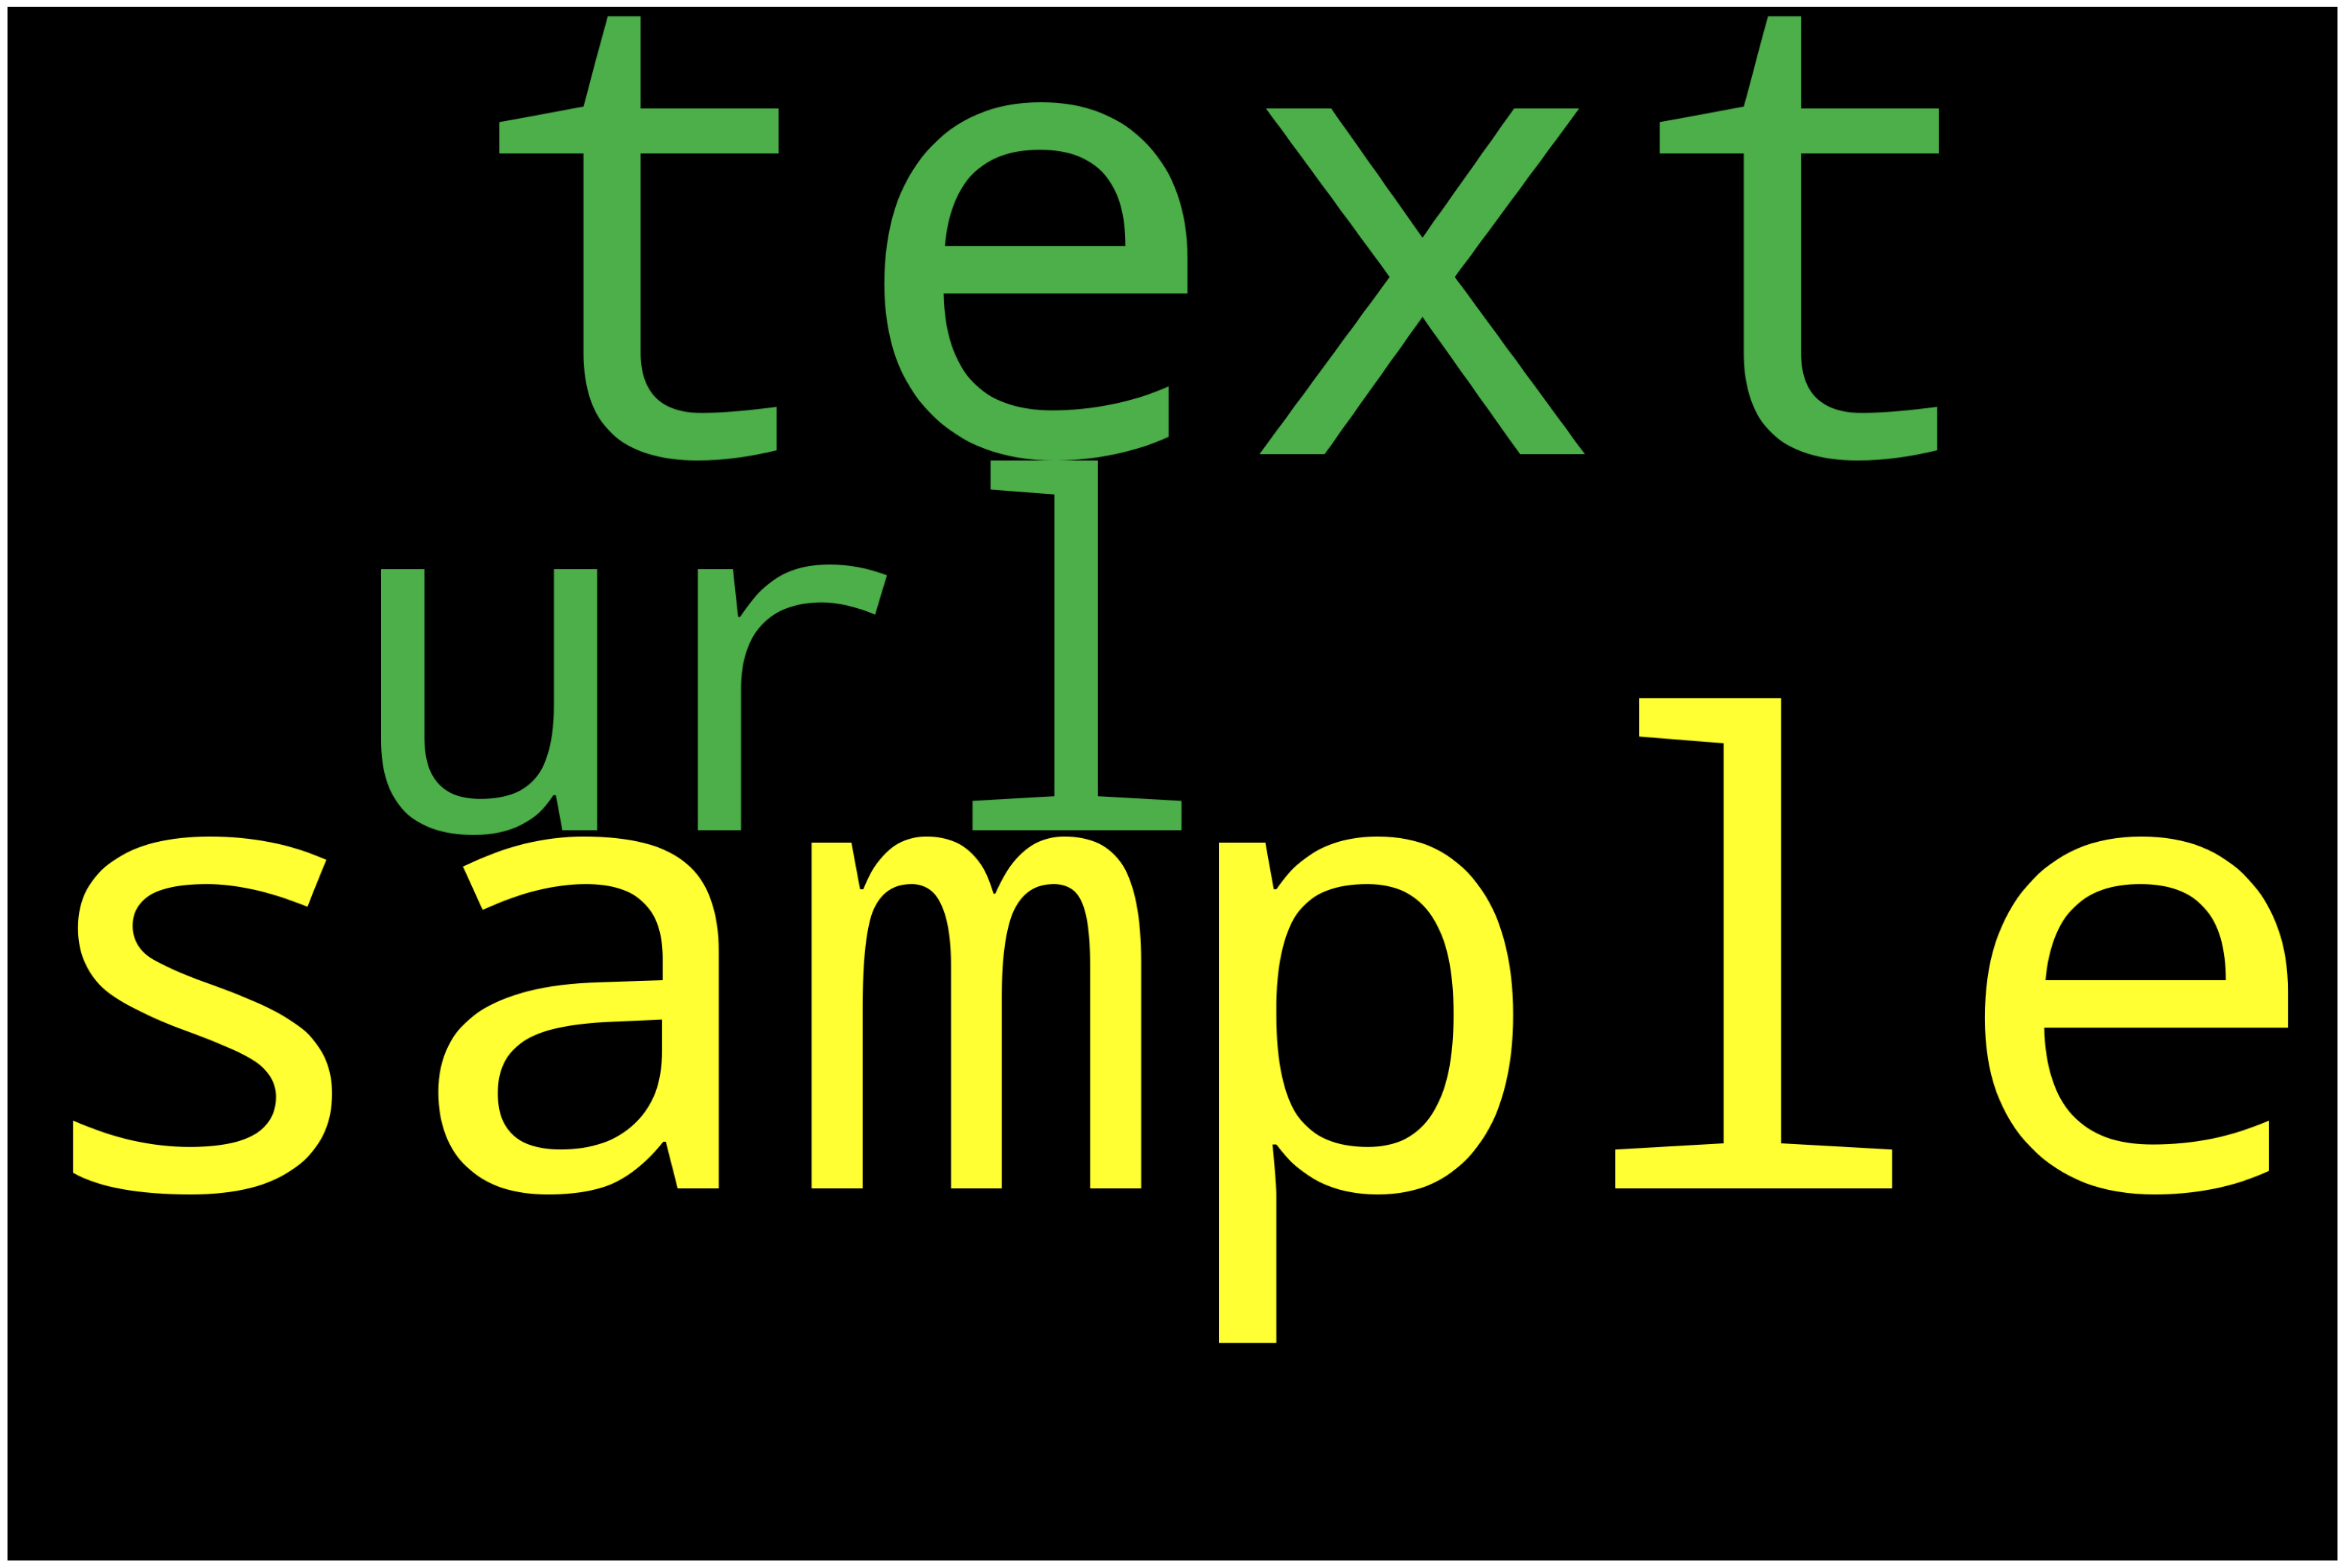

In [25]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

Named Entity Recognition (NER)

In [26]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [27]:
for token in doc_block[100:200]:
    print(token,token.pos_)

In [28]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

[]


In [29]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,sample,1
1,text,1
2,url,1


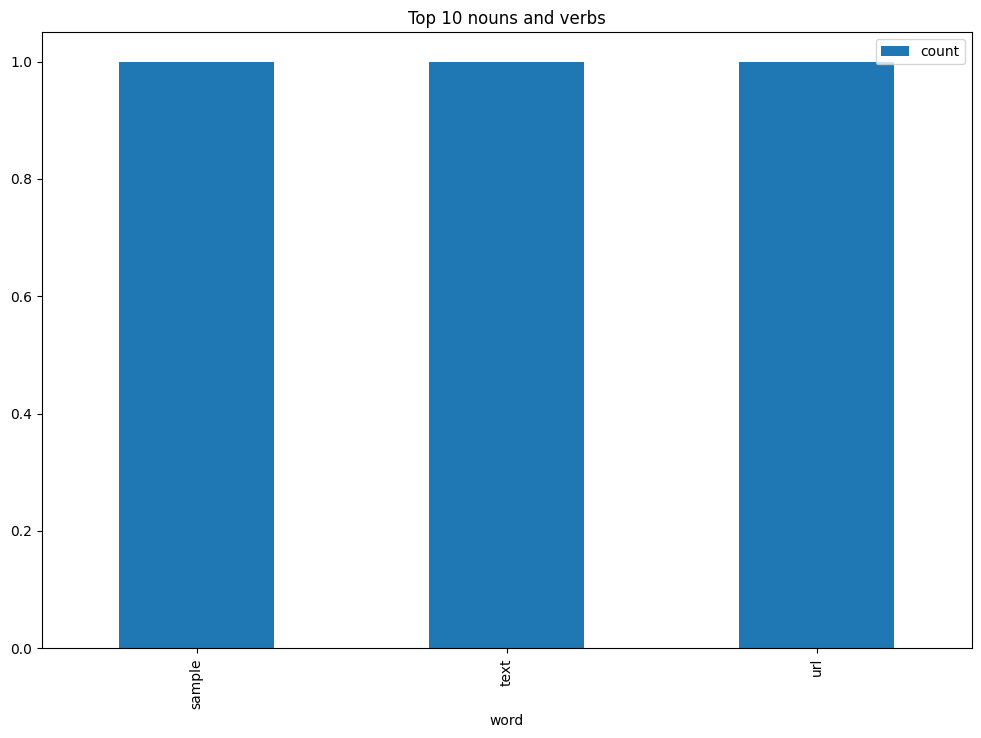

In [30]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

Emotion Mining - Sentiment Analysis

In [31]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [32]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df


,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [33]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Check if 'Afinn.csv' exists in the 'Database' directory
file_path = os.path.join(current_directory, 'Database', 'Afinn.csv')

if os.path.exists(file_path):
    print(f"'Afinn.csv' exists at {file_path}")
else:
    print("File not found. Please check the file path.")


File not found. Please check the file path.


In [34]:
import spacy

# Define your sentiment lexicon as a dictionary
sentiment_lexicon = {
    'great': 2,
    'good': 1,
    'bad': -1,
    'terrible': -2,
    # Add more words and their sentiment scores here
}

nlp = spacy.load('en_core_web_sm')

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            # Use the get method to retrieve the sentiment score for the lemma, defaulting to 0 if not found
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

# Manual testing
print(calculate_sentiment(text='great'))  # This should print 2



2


In [35]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      2
3      0
4      0
      ..
922    0
923    0
924    0
925    0
926    0
Name: sentiment_value, Length: 927, dtype: int64

In [36]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64

In [37]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
561,Starship SN8 with rear body flaps https://t.co...,-1,82
235,@RationalEtienne @MarcusHouseGame Not yet @Sta...,-1,8
285,Production/testing of rocket engines is over 9...,-1,21
64,"Also, the road to hell is mostly paved with ba...",-1,11
721,That bs has been pushed by Eberhard (worst per...,-1,25
...,...,...,...
820,Might be able to https://t.co/FB7e5nOq2E @Pri...,3,72
153,"@GUNMTLM3 @lexfridman No, but definitely this ...",3,45
532,@TeslaClubIN @WholeMarsBlog @MKBHD Next year f...,4,121
309,"Behind me is ""real"" #Dragon @Mario_Livio No ki...",4,39


In [38]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    927.000000
mean       0.211435
std        0.635996
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: sentiment_value, dtype: float64

In [39]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",0,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [40]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,2,4
29,Its great!!,2,2
30,The Second Last Kingdom https://t.co/Je4EI88Hm...,2,38
35,"By default, engine with least lever arm would ...",1,15
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",1,231
...,...,...,...
894,Ratio of retirees to workers is https://t.co/...,1,61
896,@GerberKawasaki Great work by Tesla software e...,2,49
914,He was one of the very best.,1,7
916,"@Ali_Afshari In general, we need to improve ho...",1,87


In [41]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,2,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
923,"It may never pay out, as the stock cant b ht...",0,31,923
924,Details Aug 28.,0,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,925


In [42]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,2,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
923,"It may never pay out, as the stock cant b ht...",0,31,923
924,Details Aug 28.,0,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,925


<ipython-input-43-aa15d41db3a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

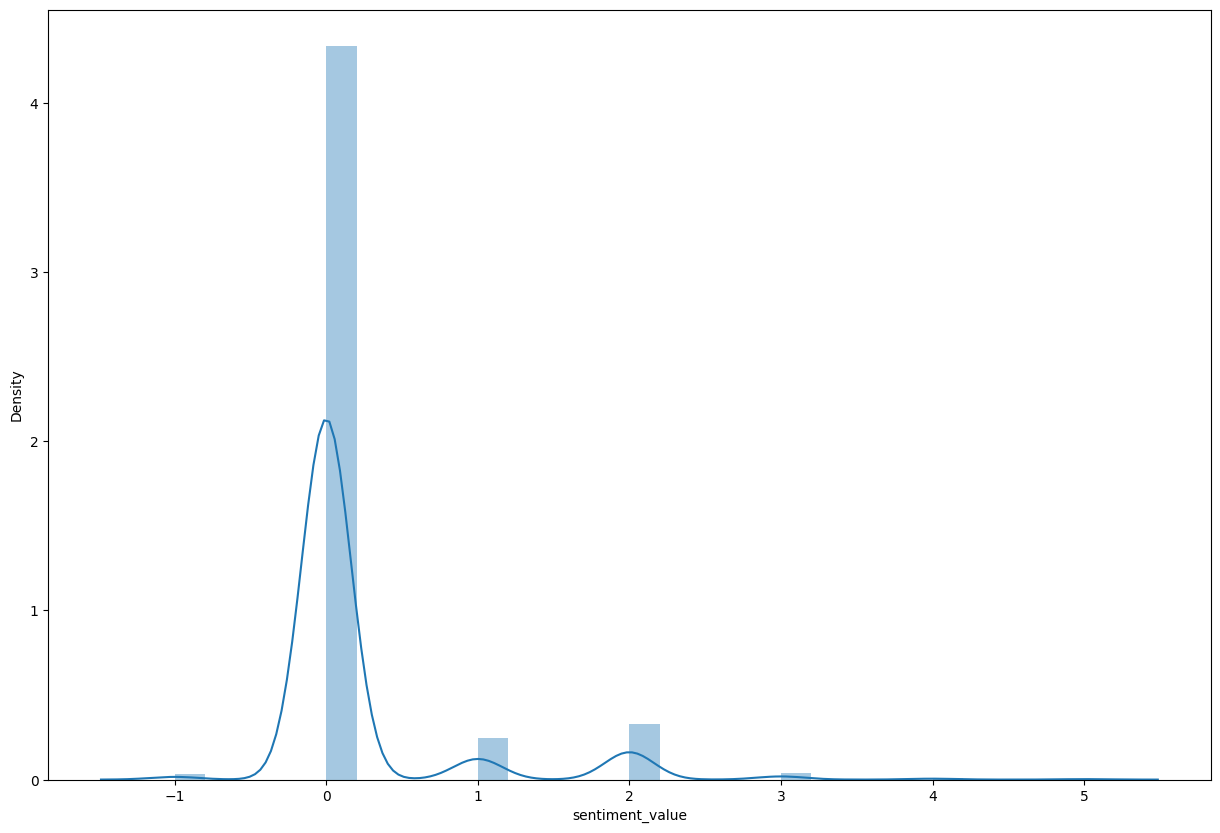

In [43]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

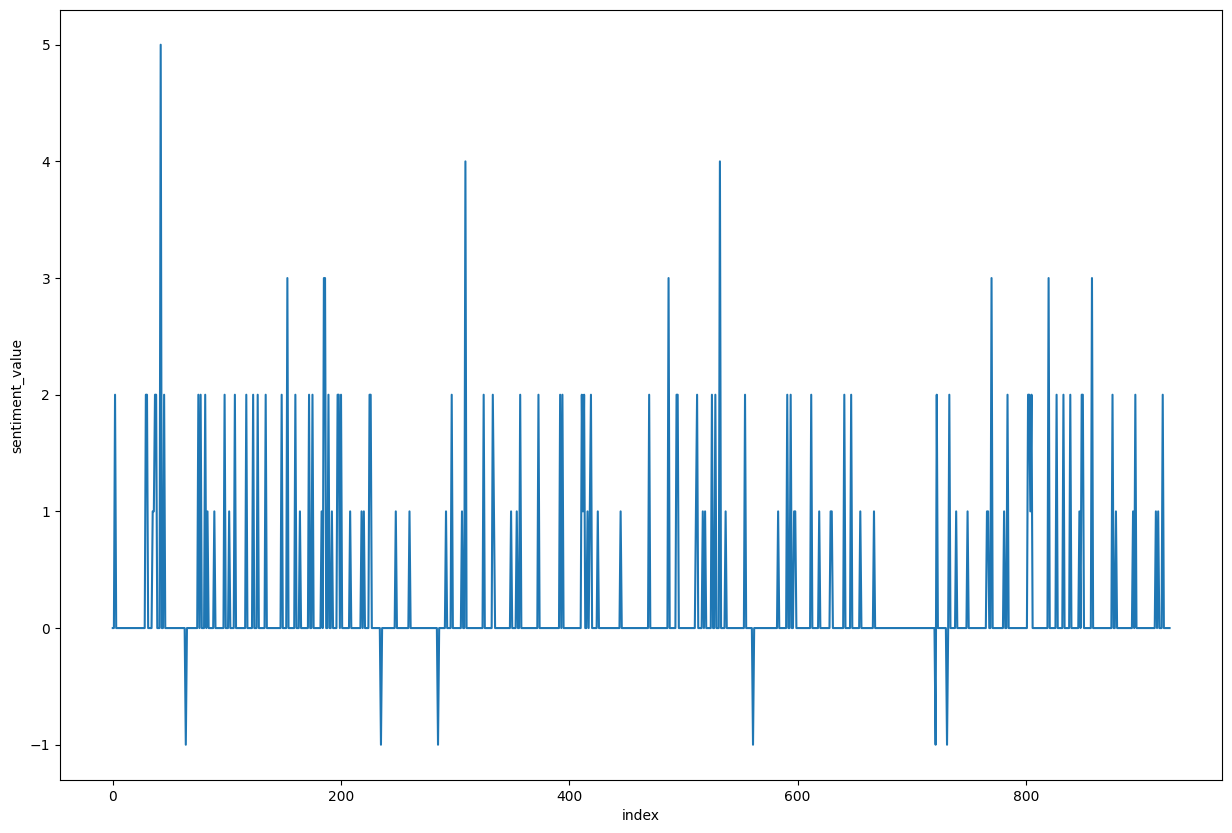

In [44]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

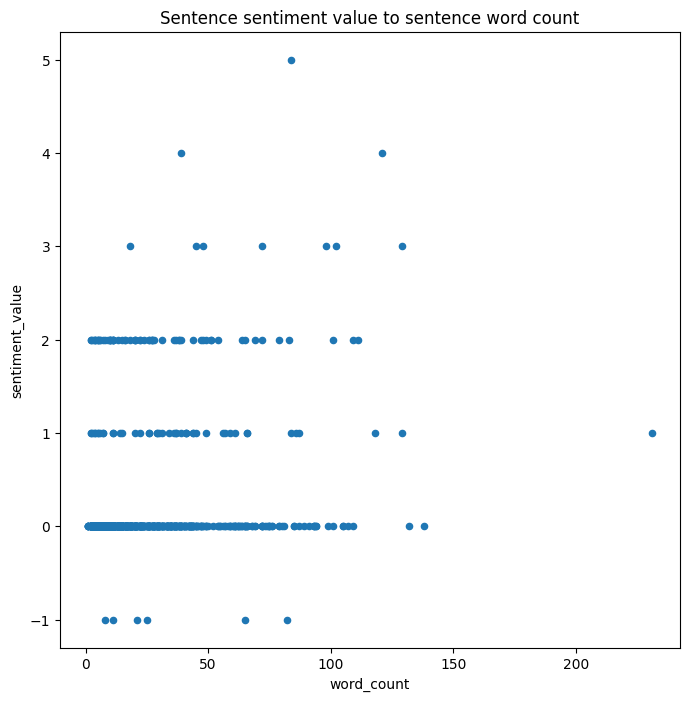

In [45]:
# Correlation analysis
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8, 8), title='Sentence sentiment value to sentence word count')


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
